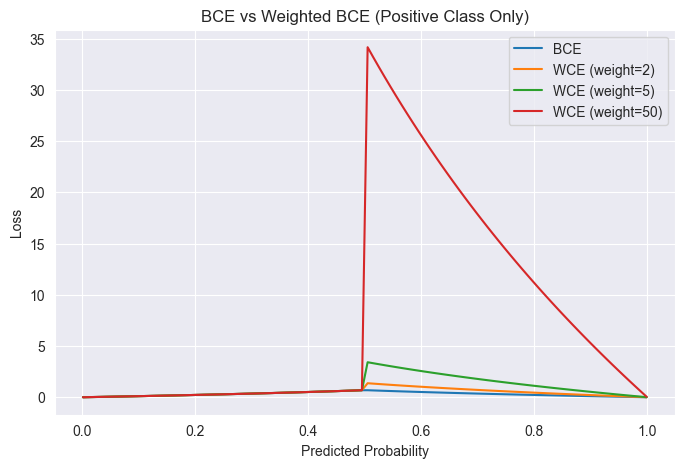

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Example probabilities from 0 to 1
probs = torch.linspace(0.001, 0.999, steps=100)  # avoid exact 0 or 1 for log stability
logits = torch.log(probs / (1 - probs))  # convert probabilities to logits

# Targets (0 = negative, 1 = positive)
targets = torch.cat([torch.zeros(50), torch.ones(50)])

# Standard BCE Loss
bce_loss = nn.BCEWithLogitsLoss(reduction='none')
loss_bce = bce_loss(logits, targets)

# Weighted BCE Loss with two different positive class weights
pos_weight1 = torch.tensor([2.0])
pos_weight2 = torch.tensor([5.0])
pos_weight3 = torch.tensor([50.0])

wce_loss1 = nn.BCEWithLogitsLoss(pos_weight=pos_weight1, reduction='none')
wce_loss2 = nn.BCEWithLogitsLoss(pos_weight=pos_weight2, reduction='none')
wce_loss3 = nn.BCEWithLogitsLoss(pos_weight=pos_weight3, reduction='none')

loss_wce1 = wce_loss1(logits, targets)
loss_wce2 = wce_loss2(logits, targets)
loss_wce3 = wce_loss3(logits, targets)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(probs.numpy(), loss_bce.detach().numpy(), label='BCE')
plt.plot(probs.numpy(), loss_wce1.detach().numpy(), label='WCE (weight=2)')
plt.plot(probs.numpy(), loss_wce2.detach().numpy(), label='WCE (weight=5)')
plt.plot(probs.numpy(), loss_wce3.detach().numpy(), label='WCE (weight=50)')
plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.title('BCE vs Weighted BCE (Positive Class Only)')
plt.legend()
plt.grid(True)
plt.show()
